<a href="https://colab.research.google.com/github/nuraimandanial/notebooks/blob/main/Lab%20Work%201%20-%2022004858.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import
Import all needed Library from Python


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data Analysis
The 'House Pricing.csv' will be loaded into the notebook and analyzed for the next implementation of variable usage in Machine Learning. From analyzation, the dataset will be explored to gain insights into the data. 

## Import/load dataset into notebook and get the simple description of the data.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LAB WORK 1/House Pricing.csv')

In [ ]:
#Get the first few rows and columns inside the dataset.
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Data analyzation into graph for the relationship of the features.

In [ ]:
columns = data.columns.tolist()

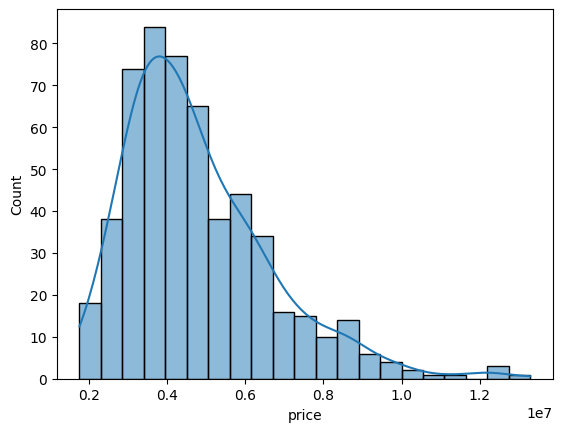


---------------------------------------------------------------------------------------



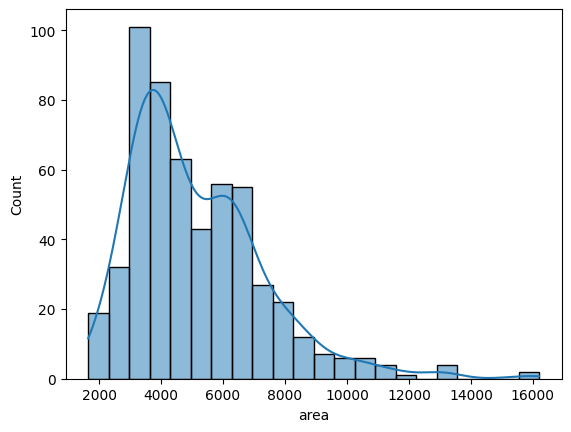


---------------------------------------------------------------------------------------



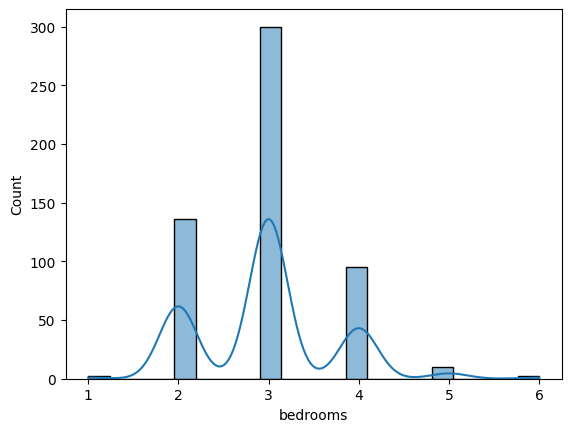

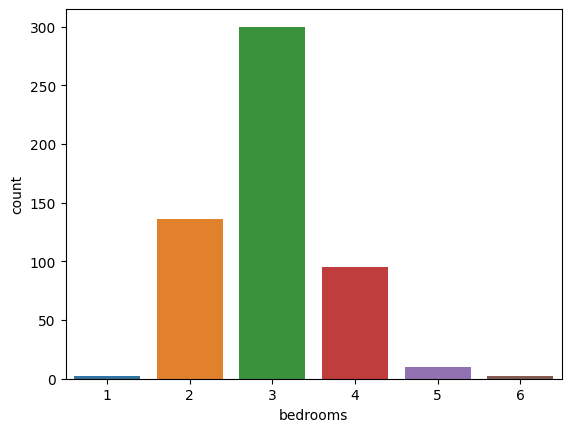


---------------------------------------------------------------------------------------



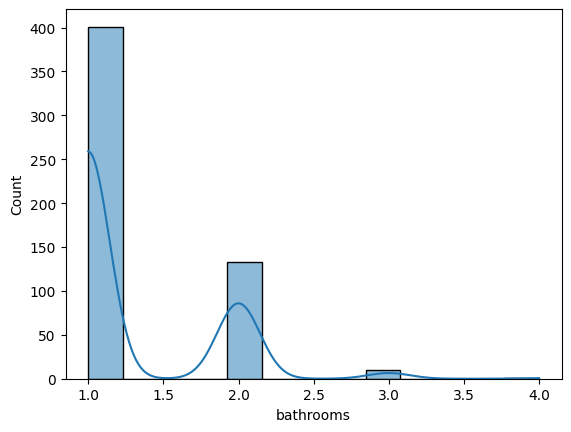

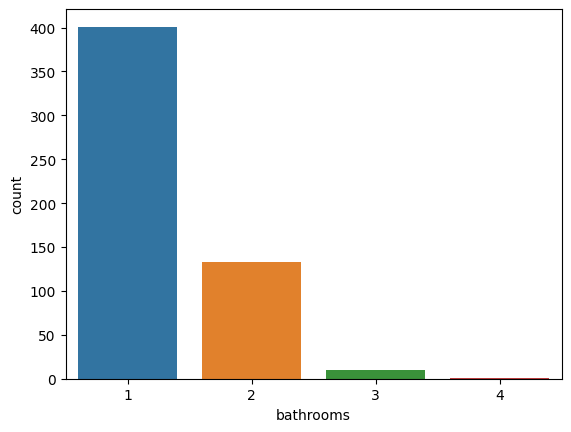


---------------------------------------------------------------------------------------



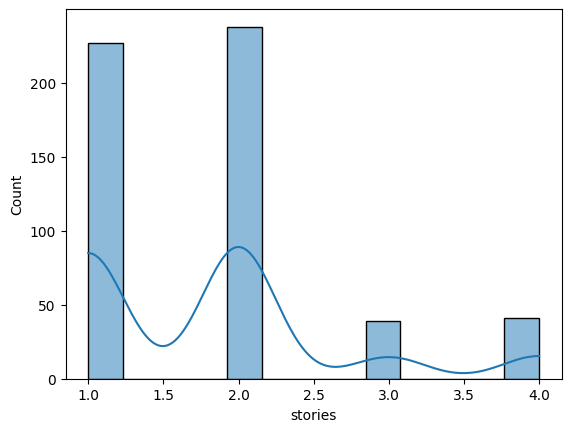

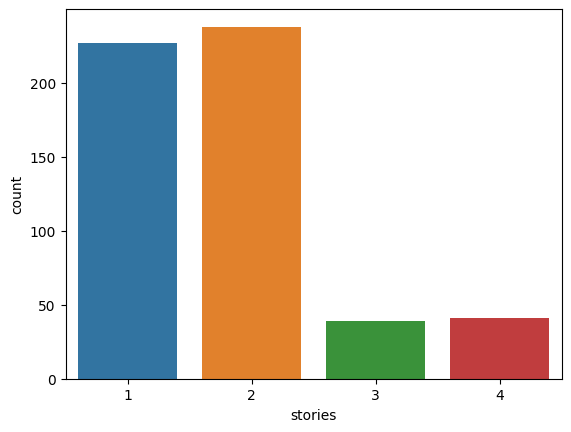


---------------------------------------------------------------------------------------



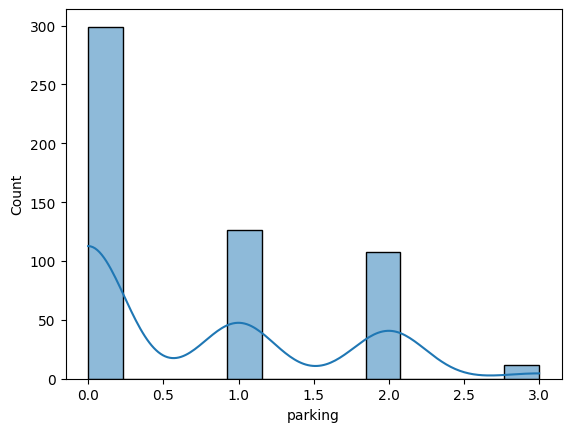

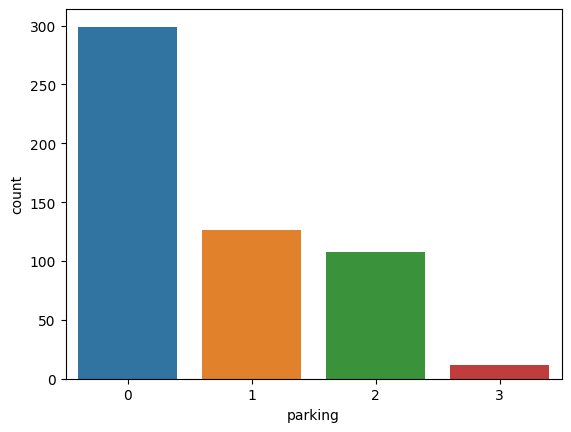


---------------------------------------------------------------------------------------



In [ ]:
for column in data.columns:
    if data[column].dtype != 'object':
        sns.histplot(data=data, x=column, kde=True)
        plt.show()
        if len(data[column].unique()) <= 10:
            sns.countplot(data=data, x=column)
            plt.show()
        print('\n---------------------------------------------------------------------------------------\n')

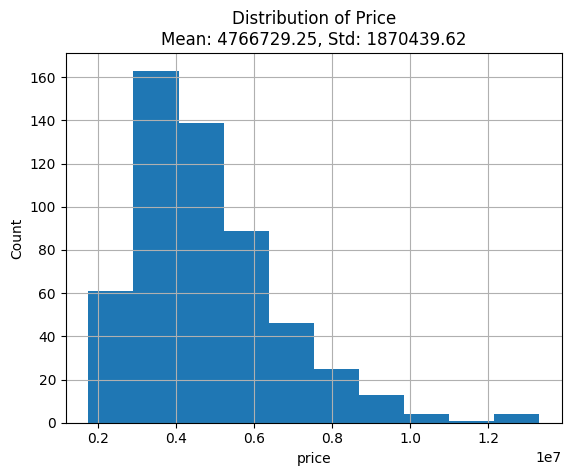

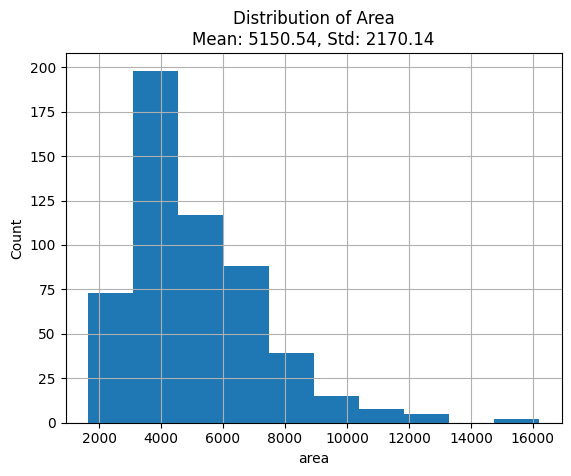

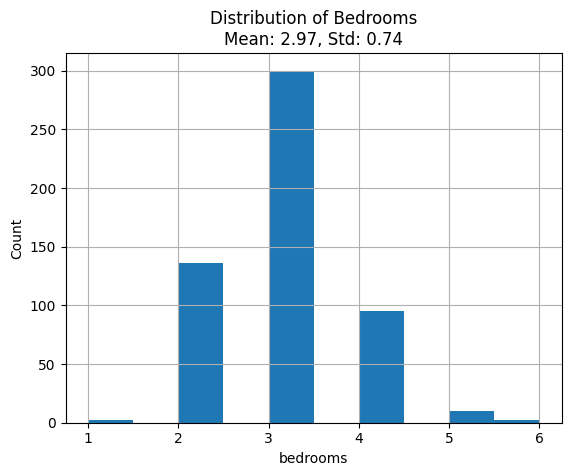

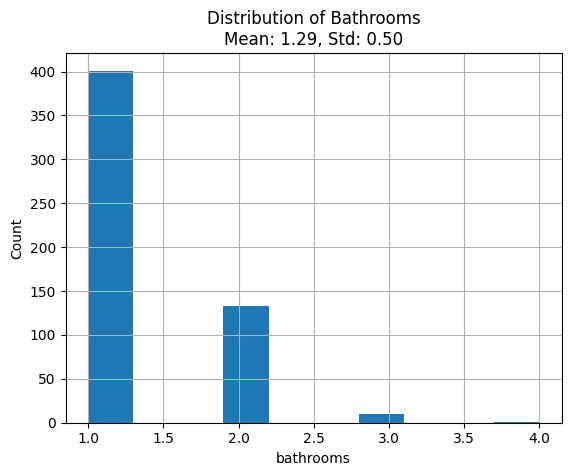

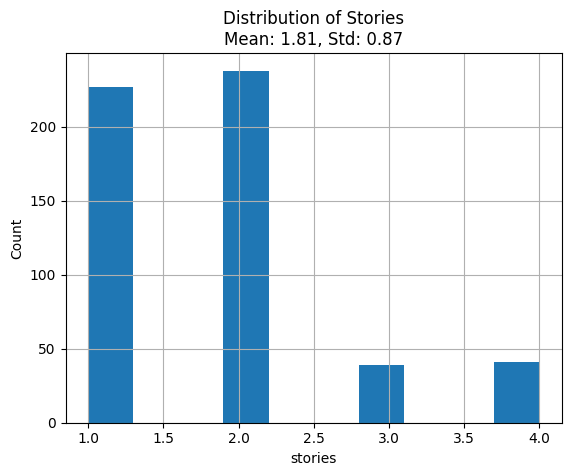

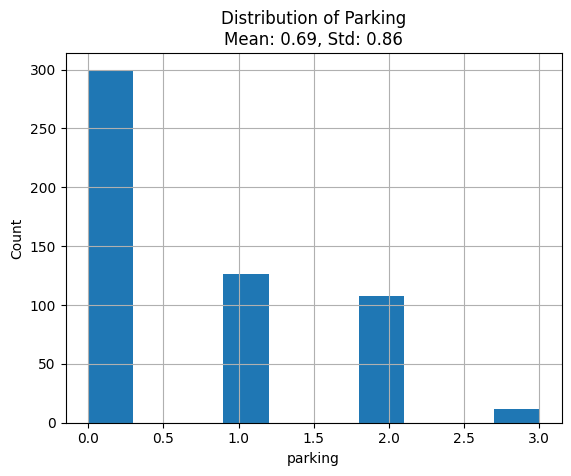

In [ ]:
#Data statistics summary from 'data.describe()'
for column in data.columns:
  if data[column].dtype != 'object':
    plt.figure()
    data[column].hist()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Distribution of {}\nMean: {:.2f}, Std: {:.2f}'.format(column.capitalize(), data[column].mean(), data[column].std()))
    plt.show()

In [ ]:
noPrice = columns.copy()
noPrice.remove('price')

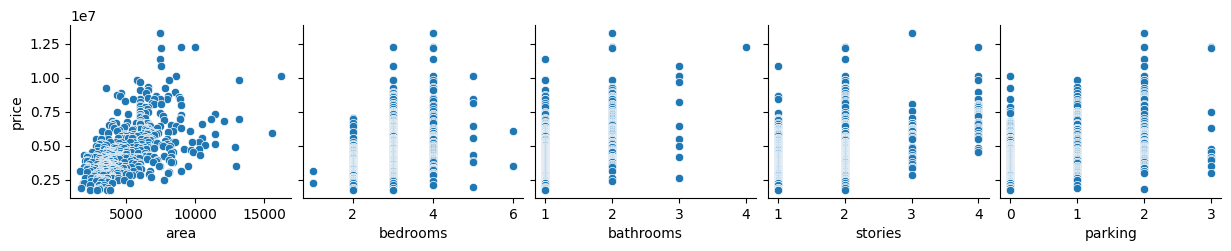

In [ ]:
numerical = []
for column in noPrice:
  if data[column].dtype != 'O':
    numerical.append(column)

sns.pairplot(data=data, x_vars=numerical, y_vars='price')
plt.show()

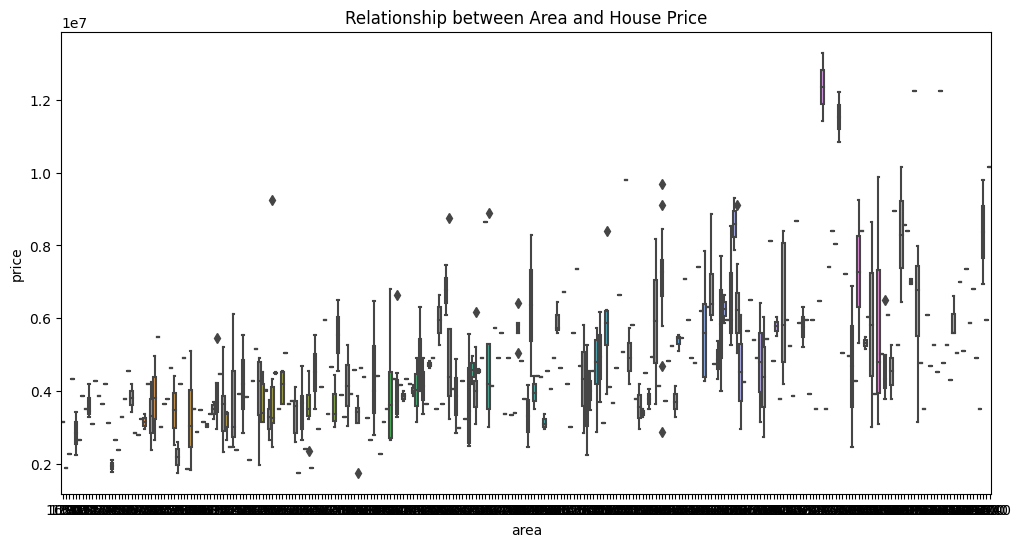

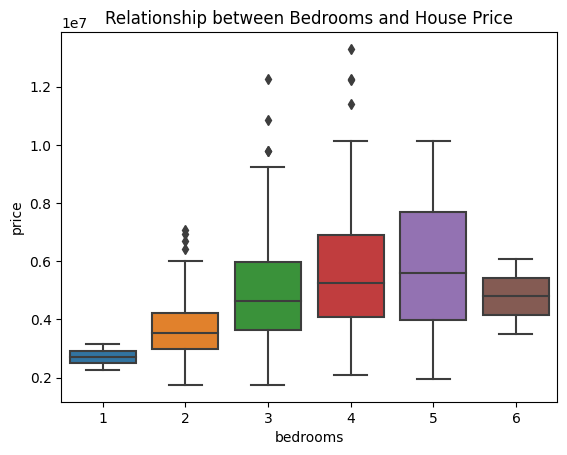

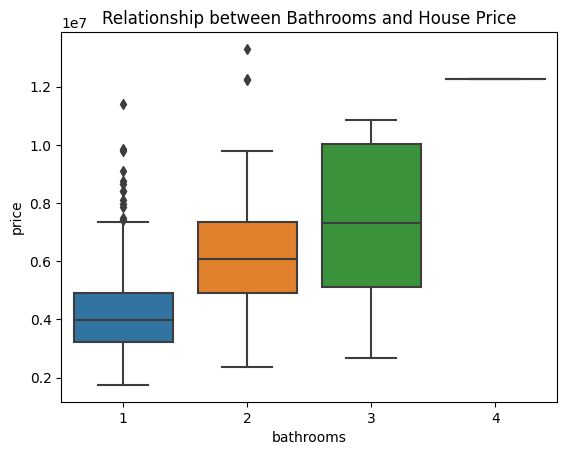

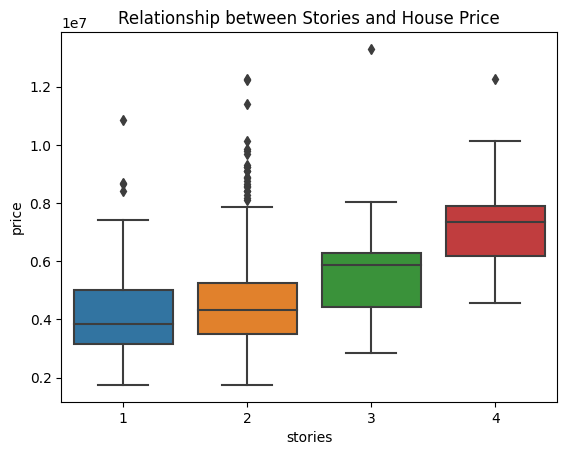

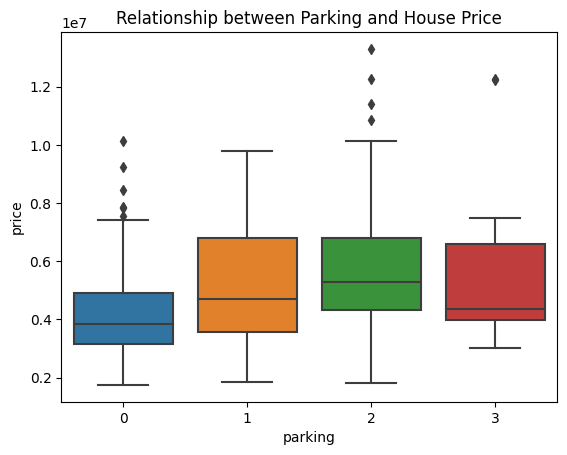

In [ ]:
categorical = []
plt.figure(figsize=(12,6))
for column in noPrice:
  if data[column].dtype != 'object':
    categorical.append(column)
    sns.boxplot(data=data, x=column, y='price')
    plt.title('Relationship between ' + column.capitalize() + ' and House Price')
    plt.show()

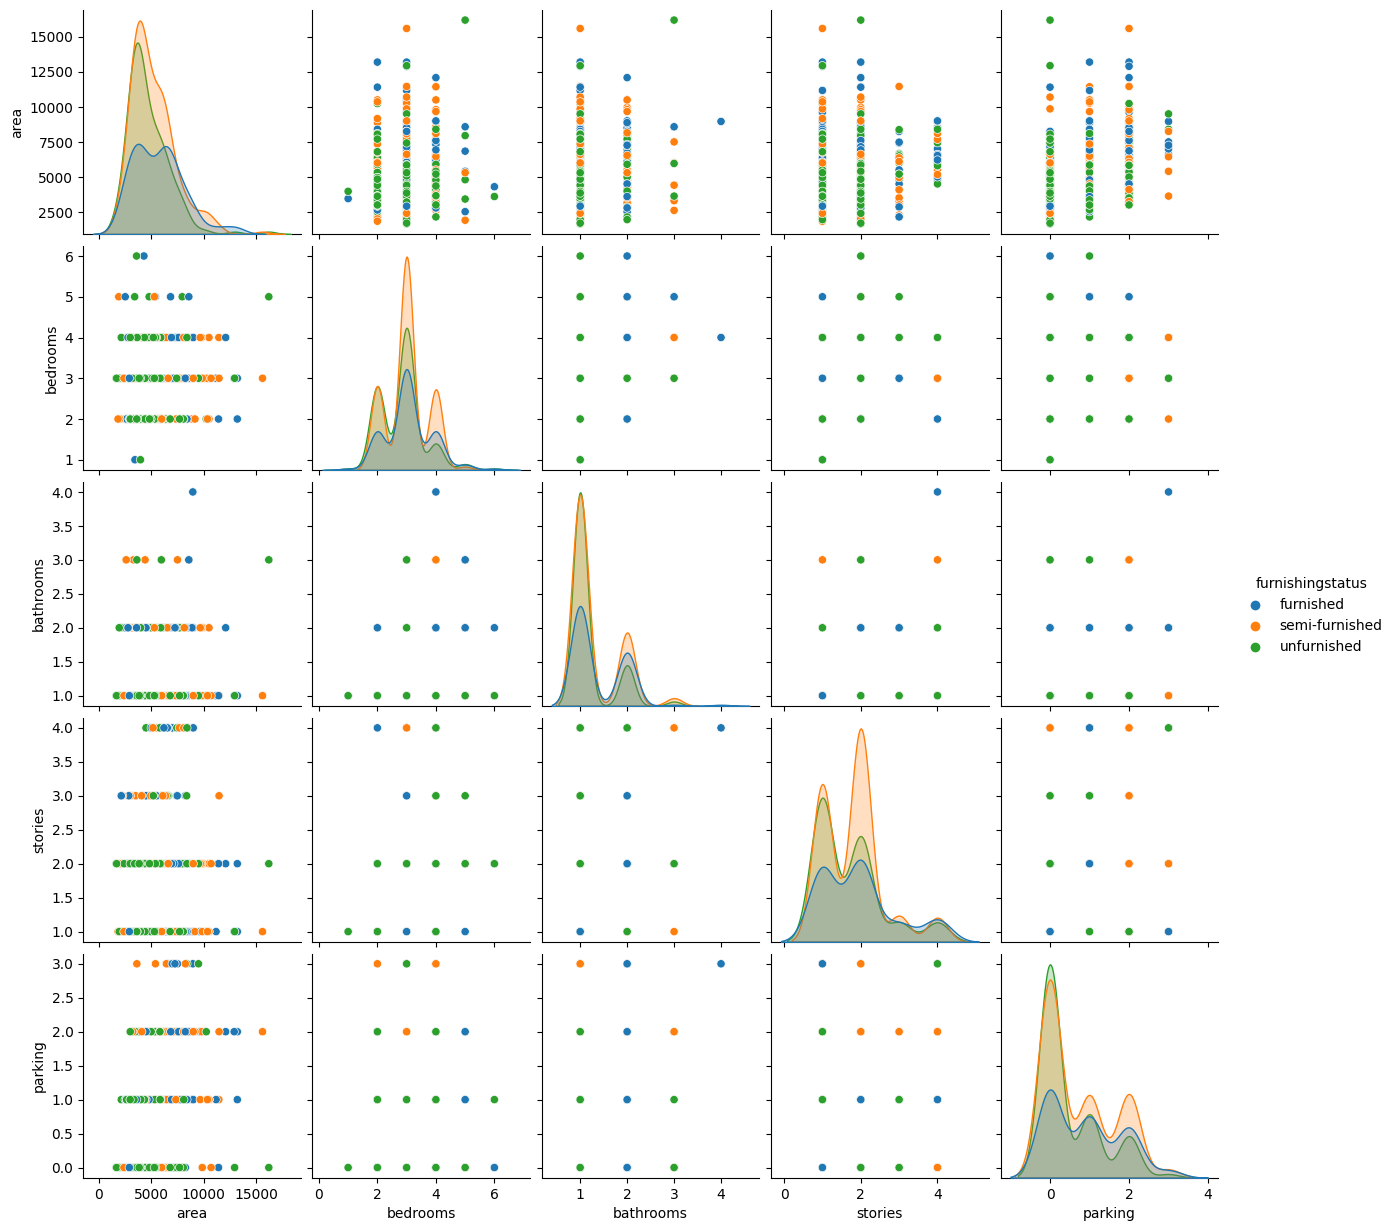

In [ ]:
sns.pairplot(data=data, vars=categorical, hue='furnishingstatus')
plt.show()

# Data Preprocessing
Perform data preprocessing tasks such as handling missing values, handling categorical variables, and scaling/normalizing the numerical features.

In [ ]:
non_numerical = [col for col in columns if col not in numerical].append('price')
data_processed = pd.get_dummies(data, columns=non_numerical)

In [ ]:
scaler = StandardScaler()
data_processed[numerical] = scaler.fit_transform(data_processed[numerical])

In [ ]:
X = data_processed.drop('price', axis=1)
y = data_processed['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.44, random_state=50)

# Regression Model Development
Implement a regression model to predict house prices based on the features. Train the regression model using the training dataset and evaluate the model with testing data using appropriate evaluation metrics.

## Linear Regression

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_lr = linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print('Linear Regression :')
print('Mean Squared Error: {:.2f}'.format(mse))
print('Root Mean Squared Error: {:.2f}'.format(rmse))
print('R-squared: {:.2f}'.format(r2))

Linear Regression :
Mean Squared Error: 1072796122411.93
Root Mean Squared Error: 1035758.72
R-squared: 0.71


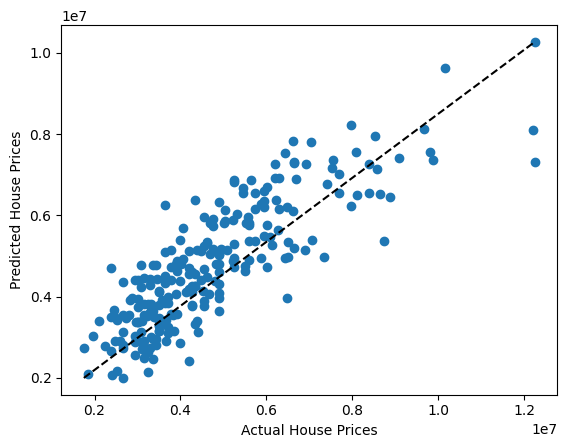

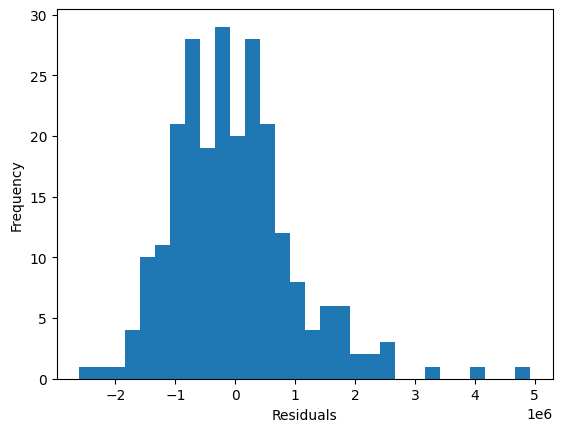

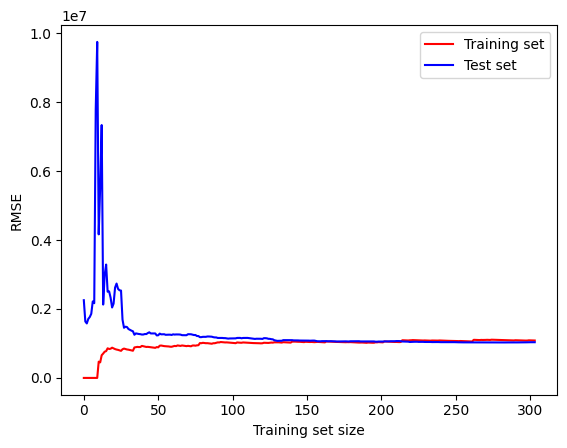

In [ ]:
import matplotlib.pyplot as plt

# Visualize the predicted vs. actual house prices using a scatter plot
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_pred_lr.min(), y_pred_lr.max()], 'k--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

# Visualize the residuals using a histogram
residuals = y_test - y_pred_lr
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visualize the learning curve using a line plot
train_errors, test_errors = [], []
for m in range(1, len(X_train)):
    linear.fit(X_train[:m], y_train[:m])
    y_train_pred = linear.predict(X_train[:m])
    y_test_pred = linear.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
plt.plot(np.sqrt(train_errors), 'r-', label='Training set')
plt.plot(np.sqrt(test_errors), 'b-', label='Test set')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train[numerical])
X_test_poly = poly.transform(X_test[numerical])

poly_linear = LinearRegression()
poly_linear.fit(X_train_poly, y_train)

y_pred_poly = poly_linear.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_poly.shape[1]-1)

print('Polynomial Regression :')
print('Mean Squared Error: {:.2f}'.format(mse))
print('Root Mean Squared Error: {:.2f}'.format(rmse))
print('R-squared: {:.2f}'.format(r2))
print("Adjusted R-squared: {:.2f}".format(adj_r2))

Polynomial Regression :
Mean Squared Error: 1494856866650.59
Root Mean Squared Error: 1222643.39
R-squared: 0.59
Adjusted R-squared: 0.55


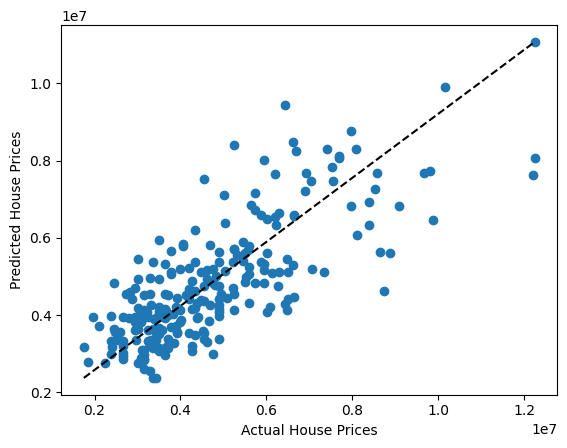

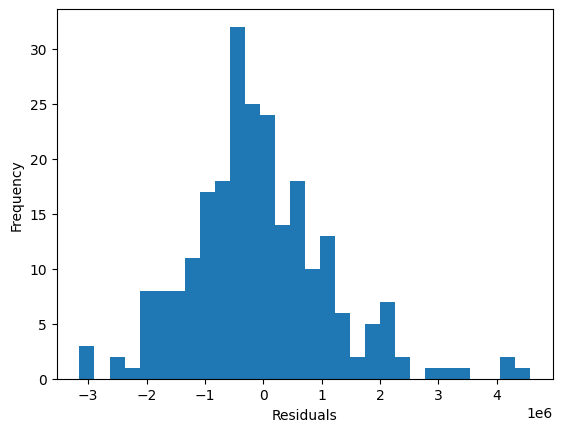

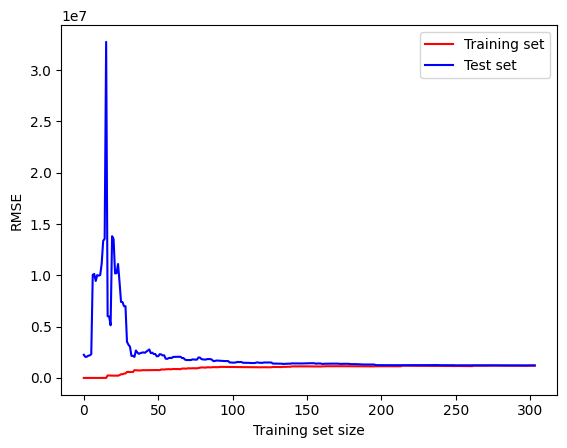

In [ ]:
import matplotlib.pyplot as plt

# Visualize the predicted vs. actual house prices using a scatter plot
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_pred_poly.min(), y_pred_poly.max()], 'k--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

# Visualize the residuals using a histogram
residuals = y_test - y_pred_poly
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visualize the learning curve using a line plot
train_errors, test_errors = [], []
for m in range(1, len(X_train_poly)):
    poly_linear.fit(X_train_poly[:m], y_train[:m])
    y_train_pred = poly_linear.predict(X_train_poly[:m])
    y_test_pred = poly_linear.predict(X_test_poly)
    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
plt.plot(np.sqrt(train_errors), 'r-', label='Training set')
plt.plot(np.sqrt(test_errors), 'b-', label='Test set')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()